The CIFAR-10 dataset consists of 60,000 photos divided into 10 classes (hence the name CIFAR-10). Classes include common objects such as airplanes, automobiles, birds, cats and so on. The dataset is split in a standard way, where 50,000 images are used for training a model and the remaining 10,000 for evaluating its performance.

The photos are in color with red, green and blue components, but are small measuring 32 by 32 pixel squares

In [1]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

Using TensorFlow backend.


In [0]:
from scipy.misc import toimage
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [0]:
batch_size = 32
num_classes = 10
epochs = 20
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [4]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [5]:
# Finding the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

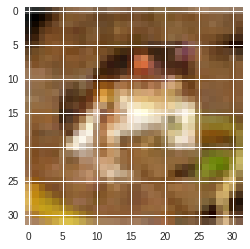

frog


In [7]:
from matplotlib import pyplot as plt
plt.imshow(x_train[0])
plt.show()
print(class_names[int(y_train[0])])

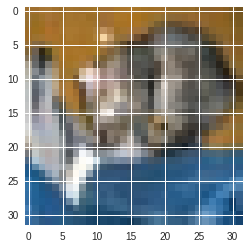

cat


In [55]:
from matplotlib import pyplot as plt
plt.imshow(x_test[0])
plt.show()
print(class_names[int(y_test[0])])

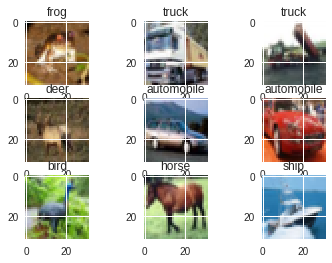

In [56]:
# create a grid of 3x3 images
for i in range(0, 9):
  plt.subplot(330 + 1 + i)
  plt.title(class_names[int(y_train[i])])
  plt.imshow(toimage(x_train[i]))
	
# show the plot
plt.show()

##Data Preprocessing

In [0]:
# Normalize inputs from 0-255 to 0.0-1.0 and change data type to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

##The Network

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [0]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [11]:
# Fit the model
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/20
11744/50000 [======>.......................] - ETA: 3:27 - loss: 2.0988 - acc: 0.2179

50000/50000 [==============================] - 274s 5ms/step - loss: 1.8126 - acc: 0.3388


Epoch 2/20
49984/50000 [============================>.] - ETA: 0s - loss: 1.4930 - acc: 0.4616

50000/50000 [==============================] - 274s 5ms/step - loss: 1.4930 - acc: 0.4616
Epoch 3/20
11808/50000 [======>.......................] - ETA: 3:29 - loss: 1.3896 - acc: 0.4965

50000/50000 [==============================] - 274s 5ms/step - loss: 1.3505 - acc: 0.5160


Epoch 4/20
49984/50000 [============================>.] - ETA: 0s - loss: 1.2524 - acc: 0.5580

50000/50000 [==============================] - 272s 5ms/step - loss: 1.2526 - acc: 0.5580
Epoch 5/20
11808/50000 [======>.......................] - ETA: 3:30 - loss: 1.1961 - acc: 0.5831

50000/50000 [==============================] - 270s 5ms/step - loss: 1.1730 - acc: 0.5880


Epoch 6/20
49984/50000 [============================>.] - ETA: 0s - loss: 1.1015 - acc: 0.6128

50000/50000 [==============================] - 271s 5ms/step - loss: 1.1015 - acc: 0.6127
Epoch 7/20
11744/50000 [======>.......................] - ETA: 3:29 - loss: 1.0581 - acc: 0.6286

50000/50000 [==============================] - 273s 5ms/step - loss: 1.0452 - acc: 0.6321


Epoch 8/20
49984/50000 [============================>.] - ETA: 0s - loss: 1.0050 - acc: 0.6480

50000/50000 [==============================] - 270s 5ms/step - loss: 1.0052 - acc: 0.6480
Epoch 9/20
11808/50000 [======>.......................] - ETA: 3:25 - loss: 0.9830 - acc: 0.6591

50000/50000 [==============================] - 269s 5ms/step - loss: 0.9684 - acc: 0.6623


Epoch 10/20
49984/50000 [============================>.] - ETA: 0s - loss: 0.9353 - acc: 0.6727

50000/50000 [==============================] - 267s 5ms/step - loss: 0.9352 - acc: 0.6727
Epoch 11/20
11744/50000 [======>.......................] - ETA: 3:25 - loss: 0.9111 - acc: 0.6817

50000/50000 [==============================] - 269s 5ms/step - loss: 0.9104 - acc: 0.6834


Epoch 12/20
49984/50000 [============================>.] - ETA: 0s - loss: 0.8829 - acc: 0.6916

50000/50000 [==============================] - 269s 5ms/step - loss: 0.8828 - acc: 0.6916
Epoch 13/20
11744/50000 [======>.......................] - ETA: 3:26 - loss: 0.8658 - acc: 0.6979

50000/50000 [==============================] - 269s 5ms/step - loss: 0.8618 - acc: 0.6998


Epoch 14/20
49984/50000 [============================>.] - ETA: 0s - loss: 0.8388 - acc: 0.7067

50000/50000 [==============================] - 269s 5ms/step - loss: 0.8388 - acc: 0.7067
Epoch 15/20
11744/50000 [======>.......................] - ETA: 3:26 - loss: 0.8324 - acc: 0.7114

50000/50000 [==============================] - 268s 5ms/step - loss: 0.8209 - acc: 0.7157


Epoch 16/20
49984/50000 [============================>.] - ETA: 0s - loss: 0.8072 - acc: 0.7203

50000/50000 [==============================] - 270s 5ms/step - loss: 0.8071 - acc: 0.7203
Epoch 17/20
11744/50000 [======>.......................] - ETA: 3:25 - loss: 0.8011 - acc: 0.7236

50000/50000 [==============================] - 268s 5ms/step - loss: 0.7951 - acc: 0.7244


Epoch 18/20
49984/50000 [============================>.] - ETA: 0s - loss: 0.7814 - acc: 0.7303

50000/50000 [==============================] - 269s 5ms/step - loss: 0.7813 - acc: 0.7303
Epoch 19/20
11744/50000 [======>.......................] - ETA: 3:24 - loss: 0.7566 - acc: 0.7399

50000/50000 [==============================] - 269s 5ms/step - loss: 0.7695 - acc: 0.7346


Epoch 20/20
49984/50000 [============================>.] - ETA: 0s - loss: 0.7618 - acc: 0.7386

50000/50000 [==============================] - 268s 5ms/step - loss: 0.7619 - acc: 0.7385


In [12]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Saved trained model at /content/saved_models/keras_cifar10_trained_model.h5 
10000/10000 [==============================] - 16s 2ms/step
Test loss: 0.7555332010269165
Test accuracy: 0.7402
